In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import plot_b, set_plot


KBEHAVS = ['FFV', 'FLS', 'FRS']

def plot_xpl(fname, INRNS, WDW, PLOT_SONG, COLOR='k', FIG_H=5):
    df_xpl = np.load(fname, allow_pickle=True)[0]['df']

    fig, axs = plt.subplots(2, 1, figsize=(15, FIG_H), tight_layout=True, sharex=True)

    ## neural
    for cinrn, inrn in enumerate(INRNS):
        axs[0].plot(df_xpl['T'], df_xpl[f'R_{inrn}']/df_xpl[f'R_{inrn}'].std()/3 - cinrn, c=COLOR)
        axs[0].axhline(-cinrn, color='gray', ls='--')
    s = np.zeros(len(df_xpl))
    s[df_xpl.S == 1] = 1
    s[(df_xpl.P == 1) | (df_xpl.F == 1)] = 2
    if PLOT_SONG:
        plot_b(axs[0], df_xpl['T'], s, extent=[0, np.array(df_xpl['T'])[-1], 1.2, 1.5], c=['w', 'b', 'r'])
    set_plot(axs[0], y_lim=[-len(INRNS), 1.6], y_ticks=-np.arange(len(INRNS)), y_tick_labels=INRNS, title='Surrogate neural activity')

    ## behavior
    for ckbehav, kbehav in enumerate(KBEHAVS):
        axs[1].plot(df_xpl['T'], df_xpl[kbehav]/df_xpl[kbehav].std()/10 - ckbehav, c='orange')
        axs[1].axhline(-ckbehav, color='gray', ls='--')
    set_plot(axs[1], x_lim=WDW, y_lim=[-len(KBEHAVS)+.5, 1], y_ticks=-np.arange(len(KBEHAVS)), y_tick_labels=KBEHAVS, x_label='Time (s)', title='Female behavior')
    
    for ax in axs:
        set_plot(ax, font_size=14)

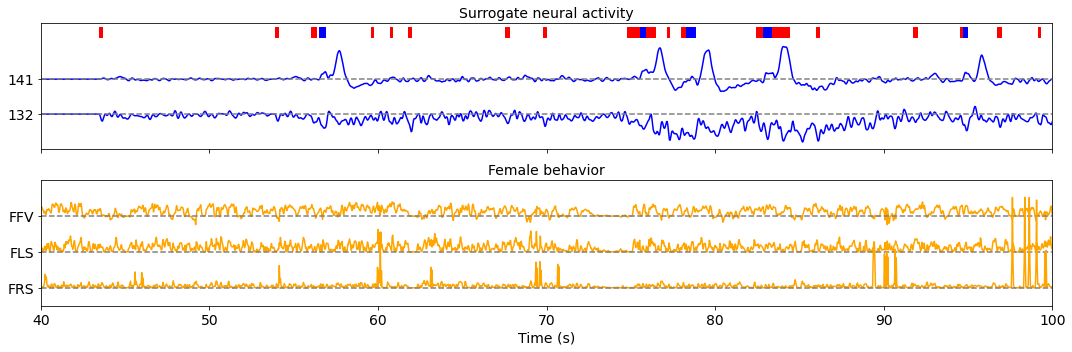

In [5]:
# example with linear neural activity
plot_xpl(f'data/simple/mlv_c/neur_basic/c_baker_lin/mlv_c_baker_lin_tr_25.npy', INRNS=[141, 132], WDW=[40, 100], COLOR='b', PLOT_SONG=True)

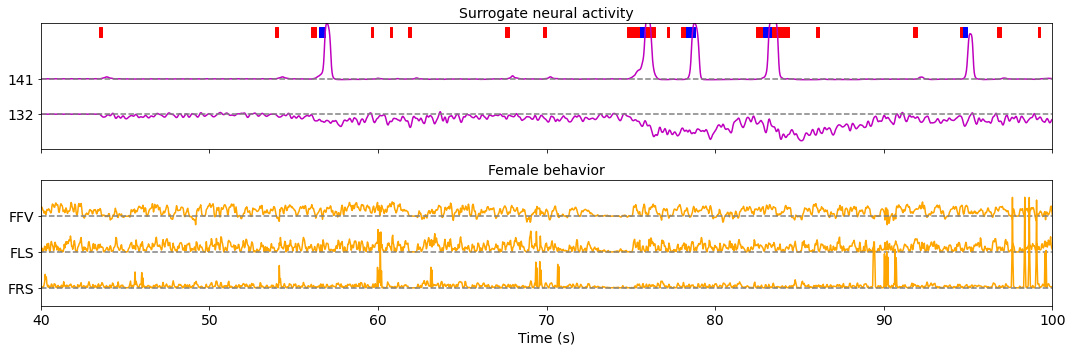

In [6]:
# example with LN neural activity
plot_xpl(f'data/simple/mlv_c/neur_basic/c_baker_ln/mlv_c_baker_ln_tr_25.npy', INRNS=[141, 132], WDW=[40, 100], COLOR='m', PLOT_SONG=True)

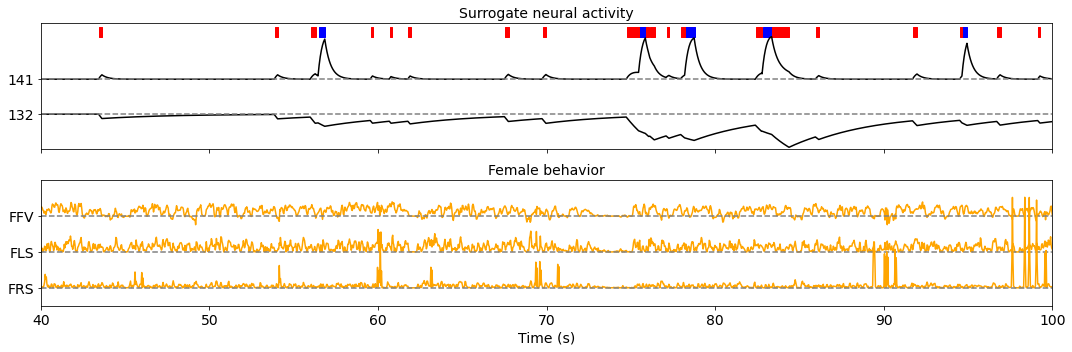

In [7]:
# example with dynamical/adaptive neural activity
plot_xpl(f'data/simple/mlv_c/neur_basic/c_baker_dyn/mlv_c_baker_dyn_tr_25.npy', INRNS=[141, 132], WDW=[40, 100], COLOR='k', PLOT_SONG=True)

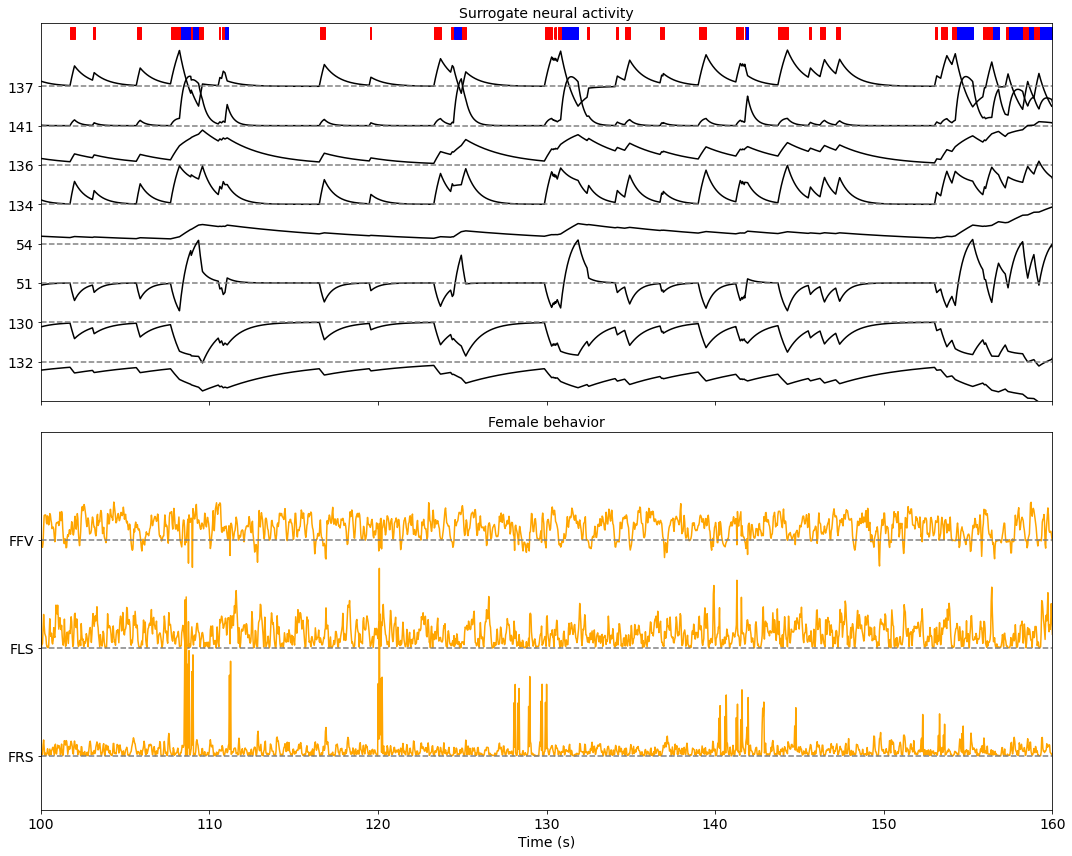

In [12]:
# example with dynamical/adaptive neural activity
plot_xpl(
    f'data/simple/mlv_c/neur_basic/c_baker_dyn/mlv_c_baker_dyn_tr_25.npy',
    INRNS=[137, 141, 136, 134, 54, 51, 130, 132],
    WDW=[100, 160], COLOR='k', PLOT_SONG=True, FIG_H=12)